<a href="https://colab.research.google.com/github/pd05849/Machine_Learning_Engineering/blob/main/HMW_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

data = load_iris()

X_original = data.data
y = data.target


petal_length = X_original[:, 2]
petal_width = X_original[:, 3]
sepal_length = X_original[:, 0]
sepal_width = X_original[:, 1]

petal_area = petal_length * petal_width
sepal_ratio = sepal_length / sepal_width


X_new = np.c_[petal_area, sepal_ratio]

print(X_new[:5])
print("-" * 50)


X_train_new, X_test_new, y_train, y_test = train_test_split(
    X_new, y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y
)

print(f'X_train with new features shape: {X_train_new.shape}')
print(f'X_test with new features shape: {X_test_new.shape}')
print("-" * 50)

svm_model = SVC(kernel='rbf', random_state=123)


svm_model.fit(X_train_new, y_train)


preds_svm = svm_model.predict(X_test_new)

accuracy = accuracy_score(y_test, preds_svm)


print(f"Accuracy Score with New Features: {accuracy:.4f}")
print("\nClassification Report with New Features:")
print(classification_report(y_test, preds_svm, target_names=data.target_names))

[[0.28       1.45714286]
 [0.28       1.63333333]
 [0.26       1.46875   ]
 [0.3        1.48387097]
 [0.28       1.38888889]]
--------------------------------------------------
X_train with new features shape: (105, 2)
X_test with new features shape: (45, 2)
--------------------------------------------------
Accuracy Score with New Features: 0.9778

Classification Report with New Features:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



QUESTION 2

Data filtered. Total even digit samples: 34418
Training set size: (24092, 784)
Test set size: (10326, 784)
Prediction complete.

Overall Accuracy on Even Digits: 0.9877


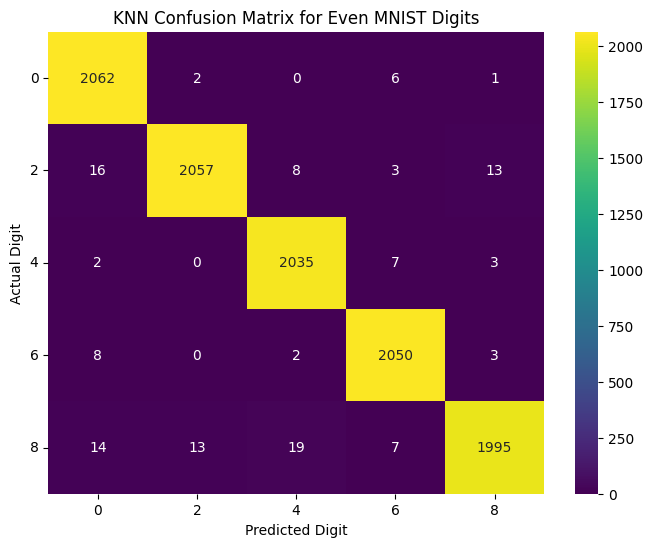

Number of '6's correctly classified: 2050


In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='auto')


X = mnist.data
y = mnist.target.astype(np.int8)


even_digits = [0, 2, 4, 6, 8]
even_mask = np.isin(y, even_digits)

X_even = X[even_mask]
y_even = y[even_mask]
print(f"Data filtered. Total even digit samples: {X_even.shape[0]}")


X_train, X_test, y_train, y_test = train_test_split(
    X_even, y_even, test_size=0.3, random_state=42, stratify=y_even
)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')



knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("Prediction complete.")



accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy on Even Digits: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=even_digits)

class_labels = [str(d) for d in even_digits]
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='viridis',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=True
)
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')
plt.title('KNN Confusion Matrix for Even MNIST Digits')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.savefig('knn_even_mnist_confusion_matrix.png')
plt.show()


correctly_classified_6s = conf_matrix[3, 3]
print(f"Number of '6's correctly classified: {correctly_classified_6s}")

QUESTION 3

Custom K-Means Accuracy: 0.8933
Scikit-learn K-Means Accuracy: 0.9067
Custom K-Means Silhouette Score: 0.5848
Scikit-learn K-Means Silhouette Score: 0.5820


/tmp/ipython-input-1936643775.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


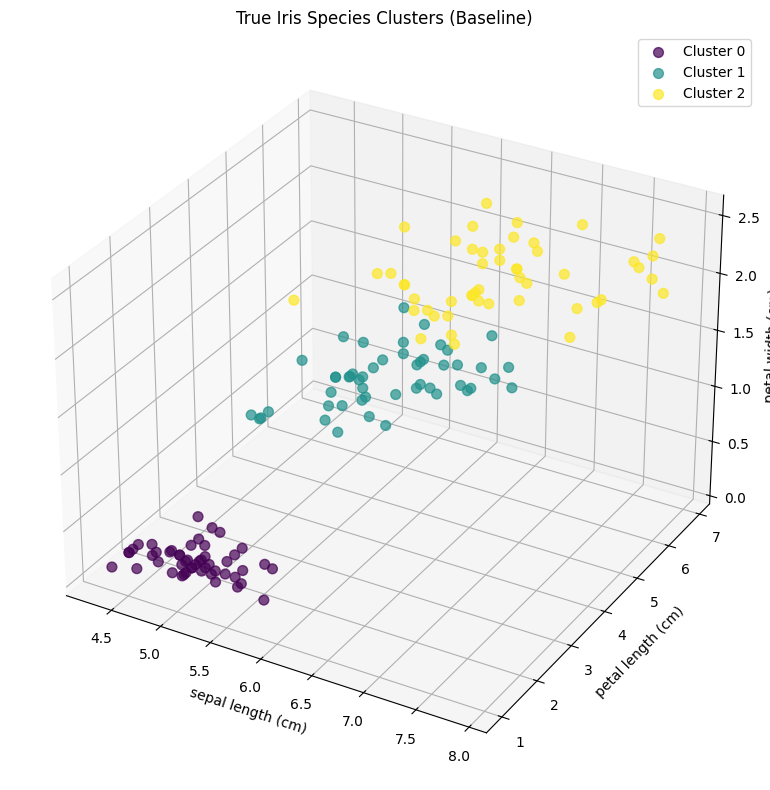

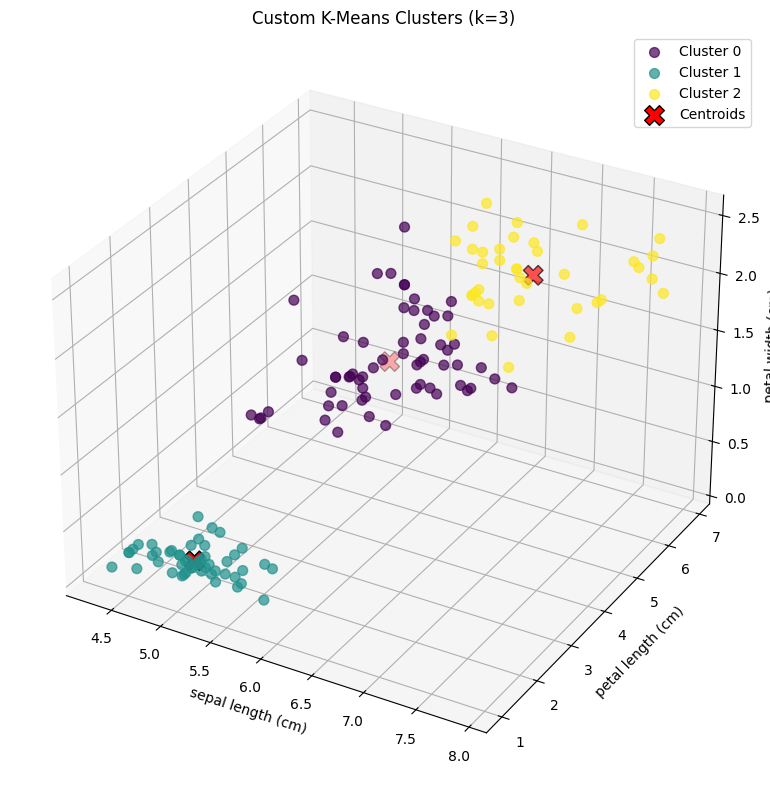

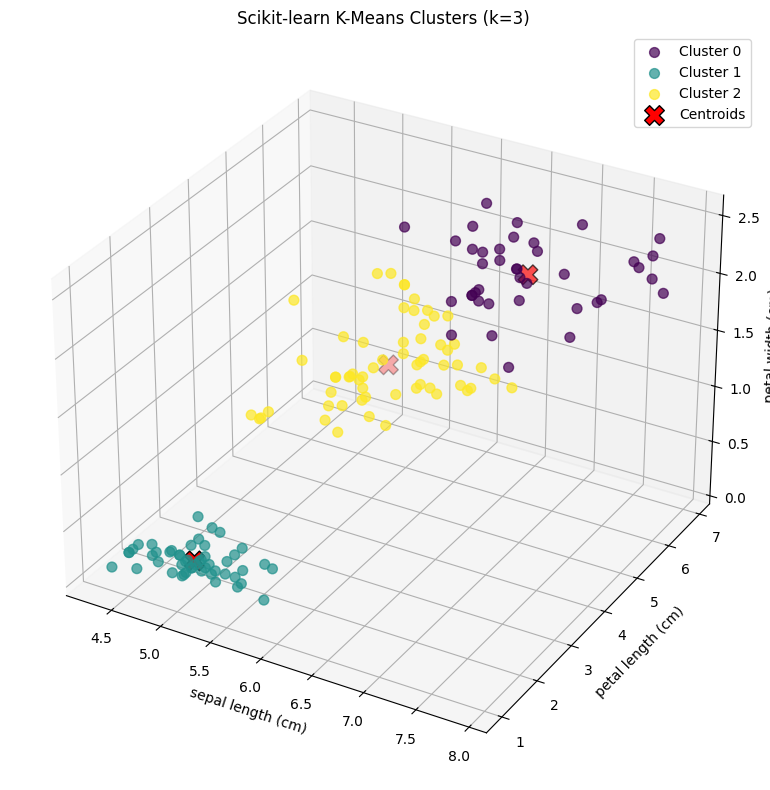

In [13]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from itertools import permutations

data = load_iris()
X = data.data[:, [0, 2, 3]]
y_true = data.target
k_value = 3

class My_KMeans:
    def __init__(self, k=3, max_iter=100, random_state=42):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

    def _euclidean_distance(self, X1, X2):
        return np.sqrt(np.sum((X1 - X2) ** 2, axis=1))

    def fit(self, X):
        np.random.seed(self.random_state)
        self.X = X
        n_samples, n_features = X.shape

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            cluster_assignments = self._assign_clusters()
            new_centroids = self._update_centroids(cluster_assignments)

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = cluster_assignments
        self.inertia_ = np.sum([np.sum((self.X[self.labels_ == i] - self.centroids[i])**2) for i in range(self.k)])
        return self

    def _assign_clusters(self):
        distances = np.array([self._euclidean_distance(self.X, centroid) for centroid in self.centroids])
        return np.argmin(distances.T, axis=1)

    def _update_centroids(self, cluster_assignments):
        new_centroids = np.zeros((self.k, self.X.shape[1]))
        for idx in range(self.k):
            points_in_cluster = self.X[cluster_assignments == idx]
            if len(points_in_cluster) > 0:
                new_centroids[idx] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[idx] = self.centroids[idx]
        return new_centroids

    def predict(self, X):
        distances = np.array([self._euclidean_distance(X, centroid) for centroid in self.centroids])
        return np.argmin(distances.T, axis=1)

custom_kmeans = My_KMeans(k=k_value, random_state=42)
custom_kmeans.fit(X)
my_labels = custom_kmeans.labels_

sklearn_kmeans = KMeans(n_clusters=k_value, random_state=42, n_init='auto')
sklearn_kmeans.fit(X)
sklearn_labels = sklearn_kmeans.labels_

custom_centroids = custom_kmeans.centroids

sklearn_centroids = sklearn_kmeans.cluster_centers_

def calculate_accuracy(true_labels, cluster_labels):
    best_accuracy = 0
    for perm in permutations(range(k_value)):
        mapped_labels = np.array([perm[label] for label in cluster_labels])
        accuracy = accuracy_score(true_labels, mapped_labels)
        best_accuracy = max(best_accuracy, accuracy)
    return best_accuracy

my_accuracy = calculate_accuracy(y_true, my_labels)
print(f"Custom K-Means Accuracy: {my_accuracy:.4f}")

sklearn_accuracy = calculate_accuracy(y_true, sklearn_labels)
print(f"Scikit-learn K-Means Accuracy: {sklearn_accuracy:.4f}")

my_silhouette = silhouette_score(X, my_labels)
print(f"Custom K-Means Silhouette Score: {my_silhouette:.4f}")

sklearn_silhouette = silhouette_score(X, sklearn_labels)
print(f"Scikit-learn K-Means Silhouette Score: {sklearn_silhouette:.4f}")

import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

feature_names = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


def plot_3d_clusters(X, labels, title, feature_names, centroids=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('viridis', len(unique_labels))

    for i, label in enumerate(unique_labels):
        cluster_data = X[labels == label]
        ax.scatter(
            cluster_data[:, 0],
            cluster_data[:, 1],
            cluster_data[:, 2],
            c=[colors(i)],
            label=f'Cluster {label}',
            marker='o',
            s=50,
            alpha=0.7
        )

    if centroids is not None:
        ax.scatter(
            centroids[:, 0],
            centroids[:, 1],
            centroids[:, 2],
            c='red',
            label='Centroids',
            marker='X',
            s=200,
            edgecolors='black'
        )

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_3d_clusters(
    X,
    y_true,
    'True Iris Species Clusters (Baseline)',
    feature_names
)


plot_3d_clusters(
    X,
    my_labels,
    'Custom K-Means Clusters (k=3)',
    feature_names,
    centroids=my_centroids
)

plot_3d_clusters(
    X,
    sklearn_labels,
    'Scikit-learn K-Means Clusters (k=3)',
    feature_names,
    centroids=sklearn_centroids
)